In [1]:
from google.colab import files
uploaded=files.upload()

Saving training.1600000.processed.noemoticon.csv to training.1600000.processed.noemoticon.csv


In [13]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
df = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1', header=None, names=cols)
display(df.head())

,sentiment,id,date,query,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
print("Dataset shape:", df.shape)
print(df['sentiment'].value_counts())

Dataset shape: (1600000, 6)
sentiment
0    800000
4    800000
Name: count, dtype: int64


In [5]:
def clean_tweet(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    return text.lower().strip()

df['cleaned'] = df['text'].astype(str).apply(clean_tweet)
df = df[df['cleaned'] != '']
print("After cleaning:", df.shape)

After cleaning: (1596443, 7)


In [6]:
mapping = {0: 'negative', 2: 'neutral', 4: 'positive'}
df['sentiment_label'] = df['sentiment'].map(mapping)
df['sentiment_enc'] = df['sentiment_label'].map({'negative':0, 'neutral':1, 'positive':2})

print(df['sentiment_label'].value_counts())

sentiment_label
negative    798346
positive    798097
Name: count, dtype: int64


In [7]:
X = df['cleaned']
y = df['sentiment_enc']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)
print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])

Train size: 1277154 Test size: 319289


In [8]:
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

print("TF-IDF Shape - Train:", X_train_tfidf.shape)

TF-IDF Shape - Train: (1277154, 5000)


In [9]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)
y_pred = model.predict(X_test_tfidf)

Classification Report:
               precision    recall  f1-score   support

         neg       0.78      0.74      0.76    159669
         pos       0.75      0.79      0.77    159620

    accuracy                           0.77    319289
   macro avg       0.77      0.77      0.77    319289
weighted avg       0.77      0.77      0.77    319289



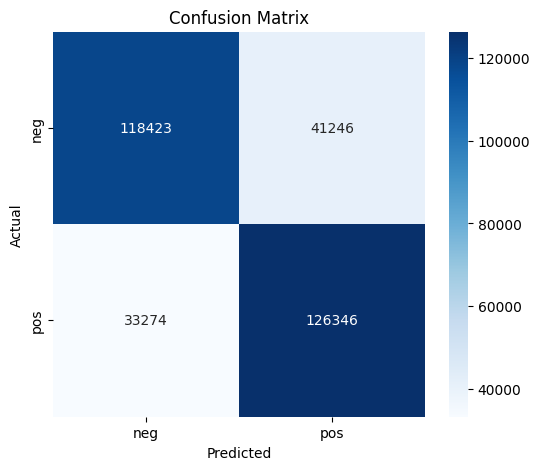

In [10]:
labels = unique_labels(y_test, y_pred)
label_map = {0: 'neg', 1: 'neu', 2: 'pos'}
target_names = [label_map[l] for l in labels]
print("Classification Report:\n", classification_report(y_test, y_pred, labels=labels, target_names=target_names))

cm = confusion_matrix(y_test, y_pred, labels=labels)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Model Used: Logistic Regression

Why This Model: It's fast, easy to understand, and works well with text data using TF-IDF, even when the classes are unbalanced.

How TF-IDF Helped:

TF-IDF turned the tweets into number-based vectors that show which words are important. This helped the model make better predictions.

Challenges & How We Solved Them:

There was an error with file encoding at first, which we fixed by using encoding='latin-1' and correcting the column names.

Removing emojis, URLs, and hashtags was tricky. We fine-tuned our regular expressions (regex) to clean them properly.

Since the data had more of one type of tweet than the other, we used stratified split and set class_weight='balanced' to help the model treat all classes fairly.